In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.colors import Normalize,LogNorm
%pylab inline
from dbscan_display import read_results,typenames,nametypes

shapes={'spec':'v',
        'toph':'s',
        'prin30':'o',
        'abun':'p',
        'tabn':'^',
        'labn':'d',
        'reda':'o',
        'trda':'o'}

sizes={'spec':20,
        'toph':20,
        'prin30':20,
        'abun':20,
        'tabn':20,
        'reda':20,
        'trda':20,
        'labn':20}

alphas={'spec':0.7,
        'toph':0.7,
        'prin30':0.7,
        'abun':0.7,
        'tabn':0.7,
        'labn':0.7}

names={'spec':'unmodified',
       'toph':'binary mask',
       'prin30':'principal components',
       'abun':'conservative',
       'tabn':'theoretical',
       'labn':'optimistic'}

cmap = plt.get_cmap('viridis')(np.linspace(0,0.8,6))
defaultcmap = 'viridis_r'
tcolors={'spec':cmap[0],
        'toph':cmap[4],
        'prin30':cmap[2],
        'abun':cmap[1],
        'tabn':cmap[3],
        'labn':cmap[5]}

Populating the interactive namespace from numpy and matplotlib


In [63]:
def stat_plots(case='12',timestamp='2018-08-27.23.06.28.732683',E=0.7,C=0.7,size=10,ind=-2.1):
    d = read_results(datatype = 'spec', case = case, 
                     timestamp = timestamp)
    d.read_base_data()
    if not d.allbad:
        d.generate_average_stats(testnum=10,testsize=size,testeff=E,testcom=E,iters=100,minmem=size)
    
    # SPECTRA
    keys = list(typenames.keys())
    keys = ['spec','toph','prin30']
    legendtitle='spectra'
    for key in keys:
        if '{0}_statsource'.format(key) in dir(d):
            ss = getattr(d,'{0}_statsource'.format(key))
            ss = ss.data
            if any(ss['numc'] > 0.5):
                params = ss['params']
                mask = ss['numc'] > 0.5
                eps = np.array([float(i.split(', ')[0]) for i in params])
                font = {'family': 'serif',
                        'weight': 'normal',
                        'size'  :  25 # Tune this according to personal preference
                        }
                maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
                matplotlib.rc('font',**font)
                plt.figure(1,figsize=(10,20))
                ax = plt.subplot(311)
                ax.set_yscale("log")
                if key == keys[0]:
                    plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4)
                    plt.text(-0.05,ss['tnumc'][0]+0.2*ss['tnumc'][0],'true number of clusters',fontsize=22)
                plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=tcolors[key],markersize=sizes[key],marker=shapes[key],ls='None')
                plt.ylabel('number of clusters found')
                fticks = np.round(np.arange(0,1.2,0.2),1)
                plt.xticks(fticks,['']*len(fticks))
                plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
                plt.tick_params(axis='y',direction='out',length=6,width=1)
                plt.ylim(0.5,2.0*ss['tnumc'][0])
                plt.xlim(-0.1,1.1)
                legend = plt.legend(loc='best',title=legendtitle)
                legend.get_frame().set_linewidth(0.0)
                plt.subplot(312)
                plt.ylabel('median($H_i$)')
                plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=tcolors[key],markersize=sizes[key],marker=shapes[key],ls='None')
                plt.ylim(-0.1,1.2)
                plt.xlim(-0.1,1.1)
                plt.xticks(fticks,['']*len(fticks))
                plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
                plt.tick_params(axis='y',direction='out',length=6,width=1)
                plt.subplot(313)
                plt.ylabel('median($C_i$)')
                plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=tcolors[key],markersize=sizes[key],marker=shapes[key],ls='None')
                plt.ylim(-0.1,1.2)
                plt.xlim(-0.1,1.1)
                plt.xlabel('f')
                plt.xticks(fticks,fticks)
                plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
                plt.tick_params(axis='y',direction='out',length=6,width=1)
                plt.subplots_adjust(hspace=0.025)
    plt.savefig('case{0}_{1}_E{2}_C{3}_size{4}_spec.pdf'.format(case,timestamp,E,C,size))
    
    # ABUNDANCES
    keys = list(typenames.keys())
    keys = ['abun','labn','tabn']
    legendtitle='abundances'
    for key in keys:
        if '{0}_statsource'.format(key) in dir(d):
            ss = getattr(d,'{0}_statsource'.format(key))
            ss = ss.data
            if any(ss['numc'] > 0.5):
                params = ss['params']
                mask = ss['numc'] > 0.5
                eps = np.array([float(i.split(', ')[0]) for i in params])
                font = {'family': 'serif',
                        'weight': 'normal',
                        'size'  :  25 # Tune this according to personal preference
                        }
                maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
                matplotlib.rc('font',**font)
                plt.rc('text', usetex=True)

                plt.figure(2,figsize=(10,20))
                ax = plt.subplot(311)
                ax.set_yscale("log")
                if key == keys[0]:
                    plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4)
                    plt.text(-0.05,ss['tnumc'][0]+0.2*ss['tnumc'][0],'true number of clusters',fontsize=22)
                plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=tcolors[key],markersize=sizes[key],marker=shapes[key],ls='None')
                plt.ylabel('number of clusters found')
                fticks = np.round(np.arange(0,1.2,0.2),1)
                plt.xticks(fticks,['']*len(fticks))
                plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
                plt.tick_params(axis='y',direction='out',length=6,width=1)
                plt.ylim(0.5,2.0*ss['tnumc'][0])
                plt.xlim(-0.1,1.1)
                legend = plt.legend(loc='best',title=legendtitle)
                legend.get_frame().set_linewidth(0.0)
                plt.subplot(312)
                plt.ylabel('median($H_i$)')
                plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=tcolors[key],markersize=sizes[key],marker=shapes[key],ls='None')
                plt.ylim(-0.1,1.2)
                plt.xlim(-0.1,1.1)
                plt.xticks(fticks,['']*len(fticks))
                plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
                plt.tick_params(axis='y',direction='out',length=6,width=1)
                plt.subplot(313)
                plt.ylabel('median($C_i$)')
                plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=tcolors[key],markersize=sizes[key],marker=shapes[key],ls='None')
                plt.ylim(-0.1,1.2)
                plt.xlim(-0.1,1.1)
                plt.xlabel('f')
                plt.xticks(fticks,fticks)
                plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
                plt.tick_params(axis='y',direction='out',length=6,width=1)
                plt.subplots_adjust(hspace=0.025)
    plt.savefig('case{0}_{1}_E{2}_C{3}_size{4}_abun.pdf'.format(case,timestamp,E,C,size))

    # RECOVERY FRACTION
    keys = list(typenames.keys())
    keys = ['spec','prin30','abun','labn','tabn']
    goodeps = []
    epsarray = []
    legendtitle='abundances'
    for key in keys:
        if '{0}_statsource'.format(key) in dir(d):
            ss = getattr(d,'{0}_statsource'.format(key))
            ss = ss.data
            if any(ss['numc'] > 0.5):
                params = ss['params']
                mask = ss['numc'] > 0.5
                eps = np.array([float(i.split(', ')[0]) for i in params])
                maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
                if len(maxrecv[0])==1:
                    goodeps.append(maxrecv[0][0])
                elif len(maxrecv[0]) > 1:
                    maxcls = np.where(ss['numc'][mask]==np.max(ss['numc'][mask]))
                    goodeps.append(maxcls[0][0])
                epsarray.append(eps[mask])
                font = {'family': 'serif',
                        'weight': 'normal',
                        'size'  :  20 # Tune this according to personal preference
                        }
                matplotlib.rc('font',**font)
                plt.rc('text', usetex=True)
                plt.figure(3,figsize=(15,6))
                plt.subplot(121)
                plt.ylabel('recovery fraction')
                plt.xlabel('f')
                plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=tcolors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]))
                plt.ylim(-0.1,1.1)
                rticks = np.arange(0,1.25,0.25)
                plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
                plt.yticks(rticks,rticks)
                plt.xlim(0.03,0.35)
                legend = plt.legend(loc='best')
                legend.get_frame().set_linewidth(0.0)
                ax = plt.subplot(122)
                ax.set_xscale("log")
                plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=tcolors[key],markersize=sizes[key],marker=shapes[key],ls='None')
                plt.tick_params(axis='y',direction='inout',length=6,width=1,left=True,right=False)
                plt.yticks(rticks,['']*len(rticks))
                plt.ylim(-0.1,1.1)
                plt.xlim(10,1.1*np.max(ss['numc'][mask]))
                plt.xlabel('number of clusters found')
                plt.subplots_adjust(wspace=0.025)
    plt.savefig('case{0}_{1}_E{2}_C{3}_size{4}_recv.pdf'.format(case,timestamp,E,C,size))
    
    for k,key in enumerate(keys):
        epsval = epsarray[k][goodeps[k]]
        d.read_run_data(eps=epsval,min_sample=3,update=True,datatype=key)
        fig = plt.figure(figsize=(15,10))
        ax = plt.subplot(221)
        ax.set_yscale('log')
        plt.suptitle('{0} - eps={1}, min={2}, {3} stars, {4} clusters, {5} groups, {6} members'.format(names[key],epsval,3,int(np.sum(d.tsize)),int(len(d.tsize)),int(len(d.msize)),int(np.sum(d.msize))))
        bins = 25
        print('\n{4}:\n \t\tNumber of stars: {0},\tnumber of clusters: {1} \n\t\tstars grouped: {2},\tnumber of groups: {3}'.format(int(np.sum(d.tsize)),int(len(d.tsize)),int(np.sum(d.msize)),int(len(d.msize)),names[key]))
        try:
            maxsize = np.max([np.max(d.tsize),np.max(d.msize)])
        except ValueError:
            maxsize = np.max(d.tsize)
        bins = np.linspace(1,maxsize,bins)
        h = plt.hist(d.tsize,bins=bins,alpha=0.8,histtype='step',normed=False,label='true clusters',linewidth=3,zorder=2)
        plt.hist(d.msize,bins=h[1],alpha=0.8,histtype='step',normed=False,label='found groups',linewidth=3,zorder=3)
        plt.plot(h[1],np.max(h[0])*h[1]**ind,color='k',alpha=0.5,label='slope = {0}'.format(ind),zorder=1)
        plt.xlabel('size (number of stars)')
        plt.ylabel('number')
        legend = plt.legend(loc='best')
        legend.get_frame().set_linewidth(0.0)
        mask = d.fsize > size
    
        ax = plt.subplot(222)
        ax.set_yscale('log')
        h = plt.hist(d.tsize,bins=bins,alpha=0.8,histtype='step',normed=True,linewidth=3,zorder=2)
        plt.hist(d.msize,bins=h[1],alpha=0.8,histtype='step',normed=True,linewidth=3,zorder=3)
        plt.plot(h[1],np.max(h[0])*h[1]**ind,alpha=0.5,color='k',zorder=1)
        plt.xlabel('size (number of stars)')
        plt.ylabel('probability')
        mask = d.fsize > size
        ax = plt.subplot(223)
        plt.plot(d.eff[mask],d.com[mask],'o',alpha=0.6)
        plt.xlabel('H')
        plt.ylabel('C')
        plt.xlim(-0.1,1.1)
        plt.ylim(-0.1,1.1)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
        ax1.set_xscale('log')
        com = (d.com[mask]).tolist()
        fsize=d.fsize[mask]
        fsil=d.fsil[mask]
        msize=d.msize[mask]
        msil=d.msil[mask]
        sc = ax1.scatter(fsize,fsil,c=com,cmap=defaultcmap,norm=Normalize(vmin=0,vmax=1),alpha=0.7)
        ax1.set_ylabel('found $S_i$')
        ax1.set_ylim(-0.1,1.1)
        ax2.set_xscale('log')
        sc = ax2.scatter(msize,fsil,c=com,cmap=defaultcmap,norm=Normalize(vmin=0,vmax=1),alpha=0.7)
        ax2.set_ylim(-0.1,1.1)
        ax3.set_xscale('log')
        sc = ax3.scatter(fsize,msil,c=com,cmap=defaultcmap,norm=Normalize(vmin=0,vmax=1),alpha=0.7)
        ax3.set_ylabel('matched $S_i$')
        ax3.set_xlabel('found size')
        ax3.set_ylim(-0.1,1.1)
        ax4.set_xscale('log')
        sc = ax4.scatter(msize,msil,c=com,cmap=defaultcmap,norm=Normalize(vmin=0,vmax=1),alpha=0.7)
        ax4.set_ylim(-0.1,1.1)
        ax4.set_xlabel('matched size')
        cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])
        cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
        plt.subplots_adjust(hspace=0.05,wspace=0.025,bottom=0.25)
            

# Standard case

spectra
abundances
reduced abundances
tophat windows
windows
10 principal components
02 principal components
05 principal components
20 principal components
30 principal components
50 principal components
ting abundances
reduced ting abundances
leung abundances
reduced leung abundances

unmodified:
 		Number of stars: 50064,	number of clusters: 23369 
		stars grouped: 371,	number of groups: 43

principal components:
 		Number of stars: 50064,	number of clusters: 23369 
		stars grouped: 27920,	number of groups: 1965

conservative:
 		Number of stars: 50064,	number of clusters: 23369 
		stars grouped: 821,	number of groups: 118

optimistic:
 		Number of stars: 50064,	number of clusters: 23369 
		stars grouped: 8314,	number of groups: 1403

theoretical:
 		Number of stars: 50064,	number of clusters: 23369 
		stars grouped: 20678,	number of groups: 2457


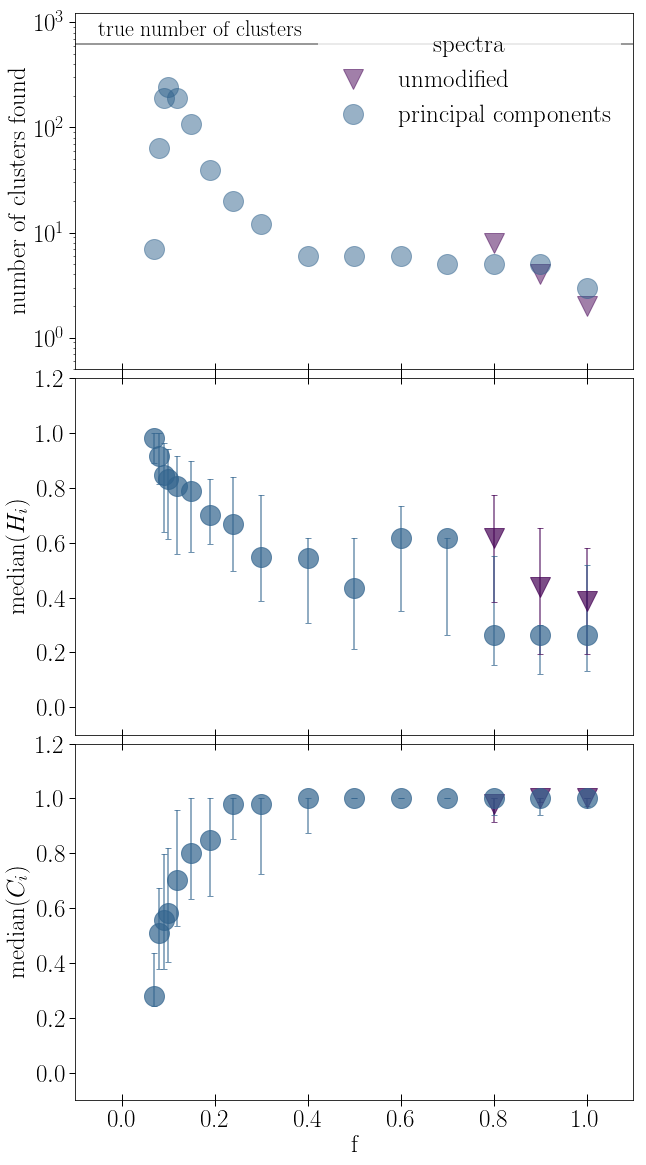

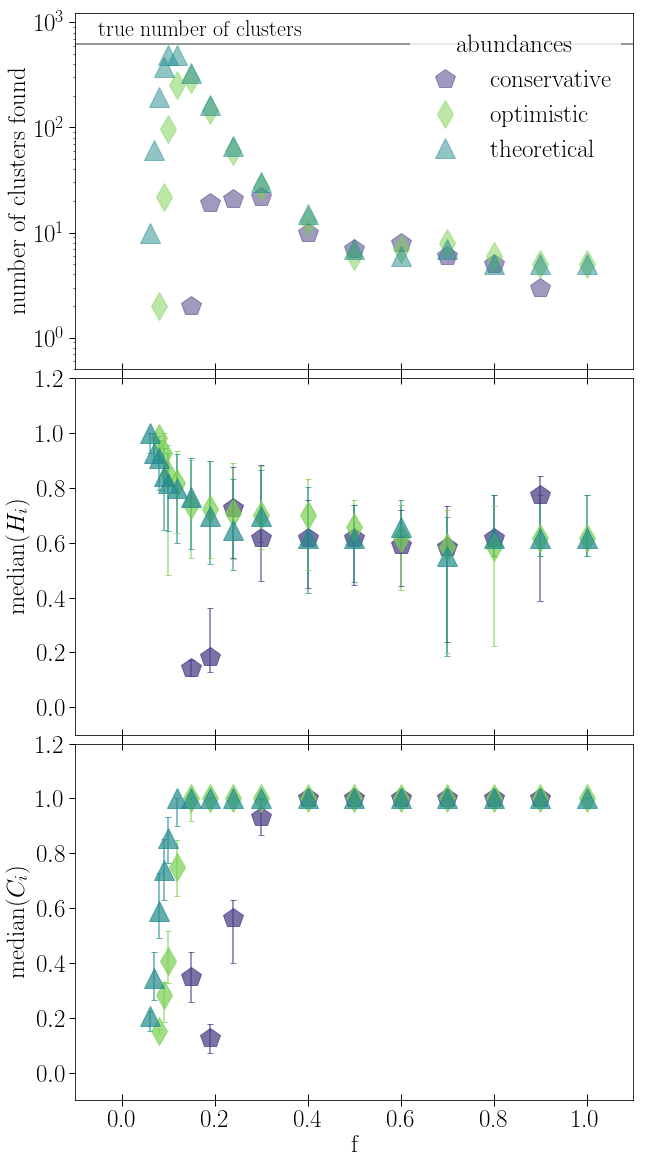

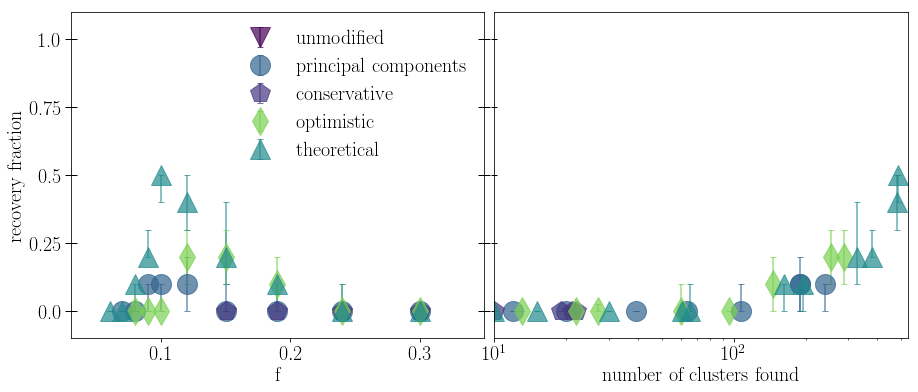

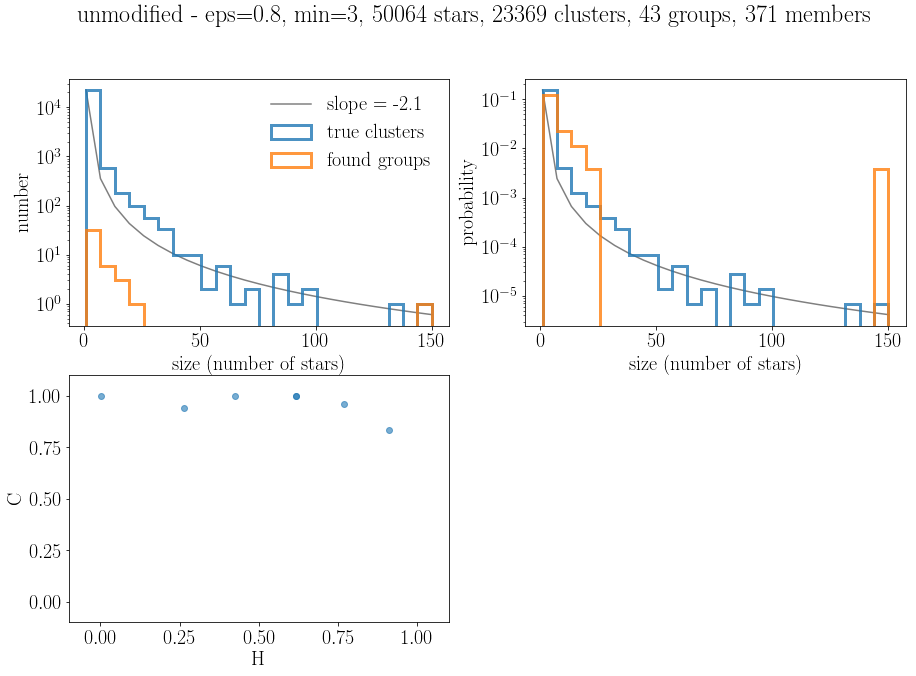

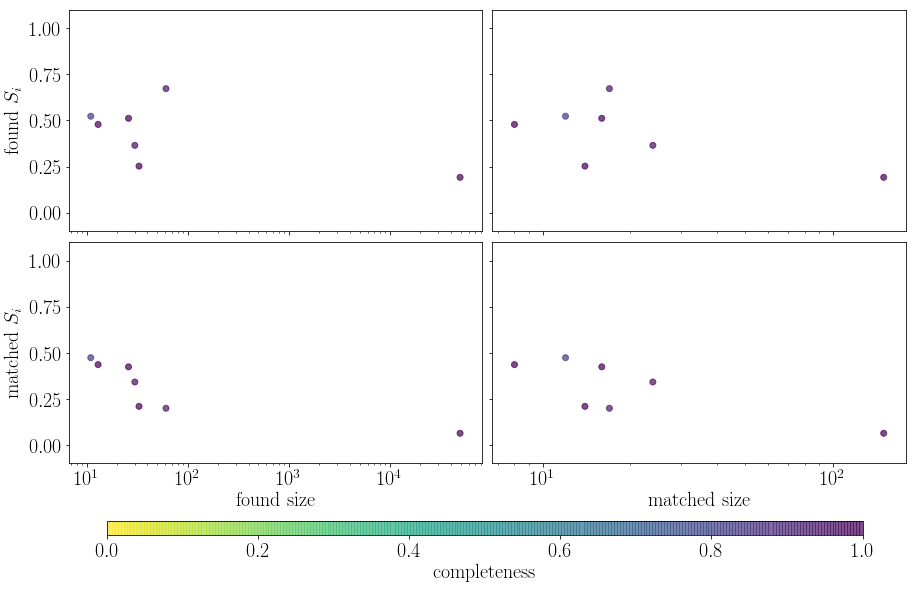

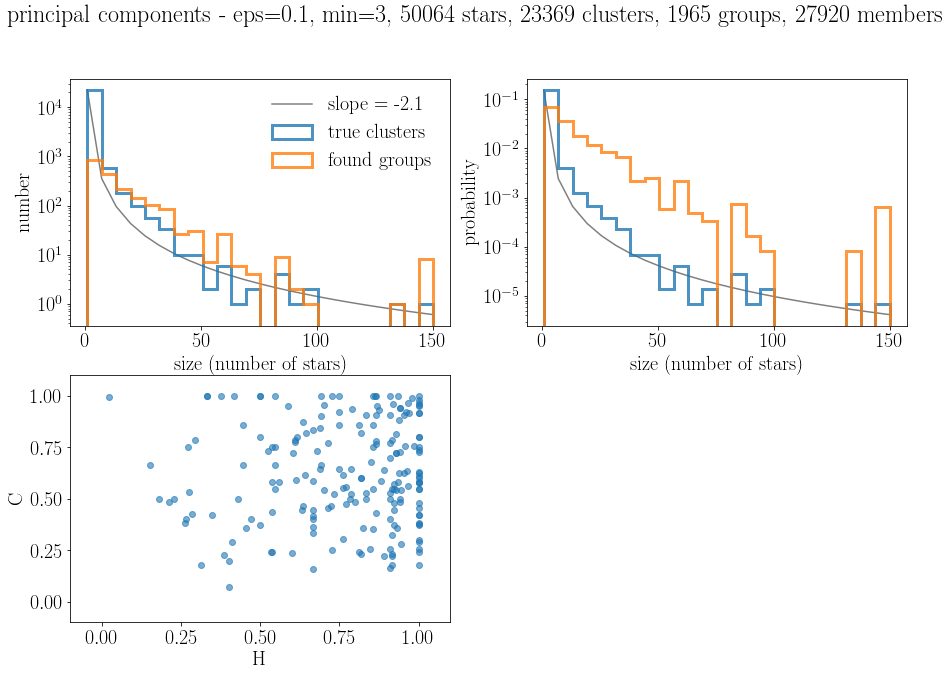

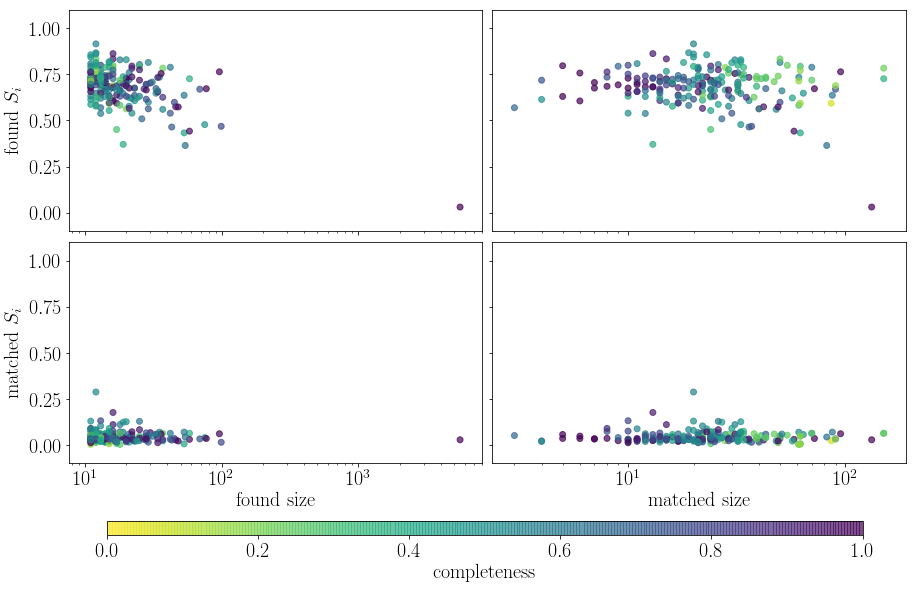

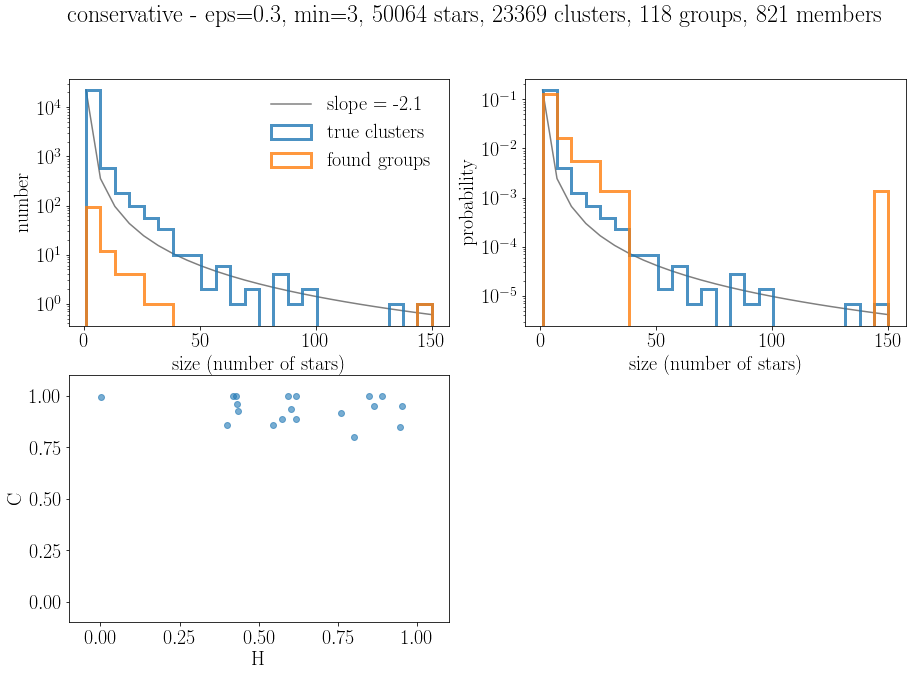

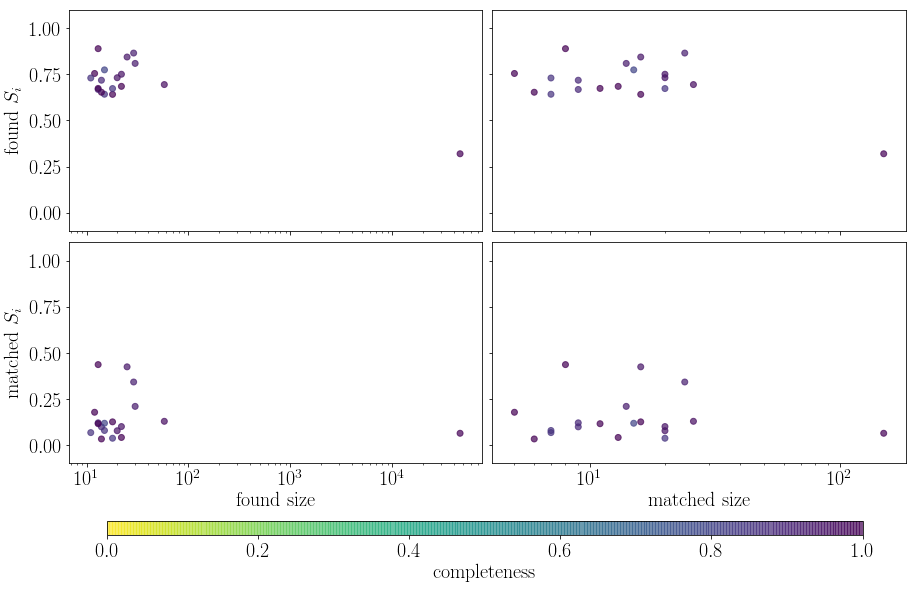

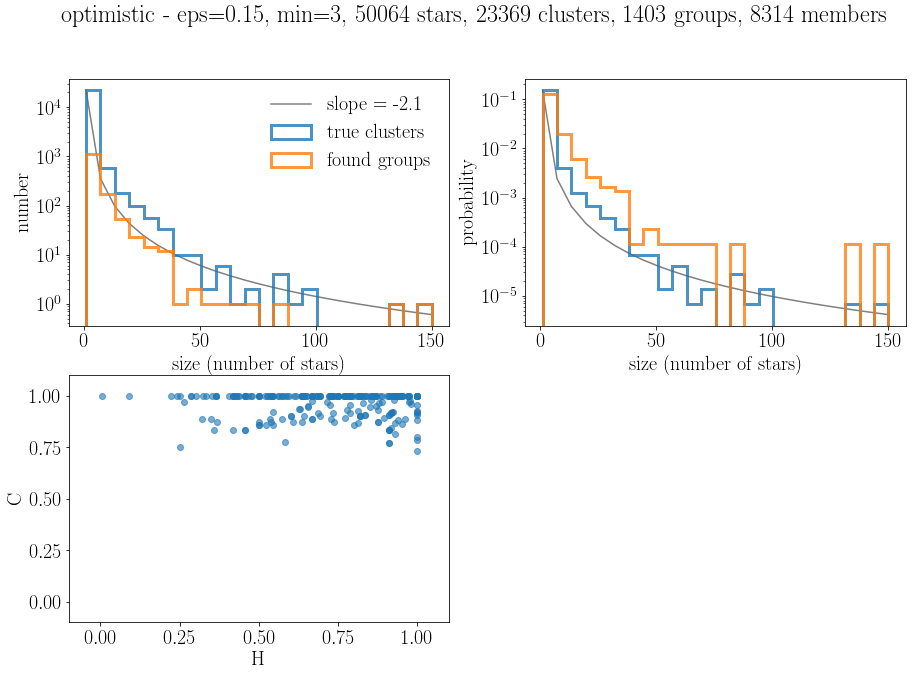

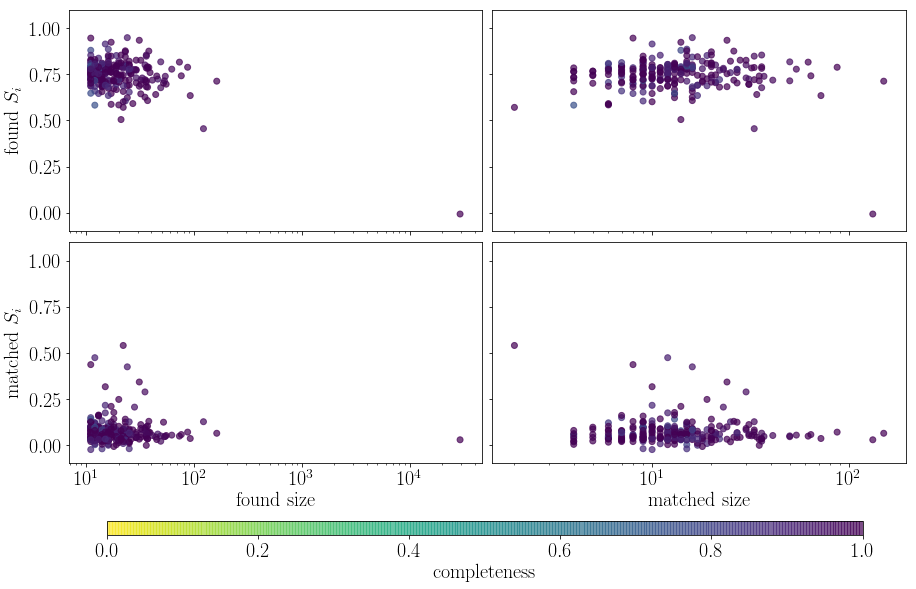

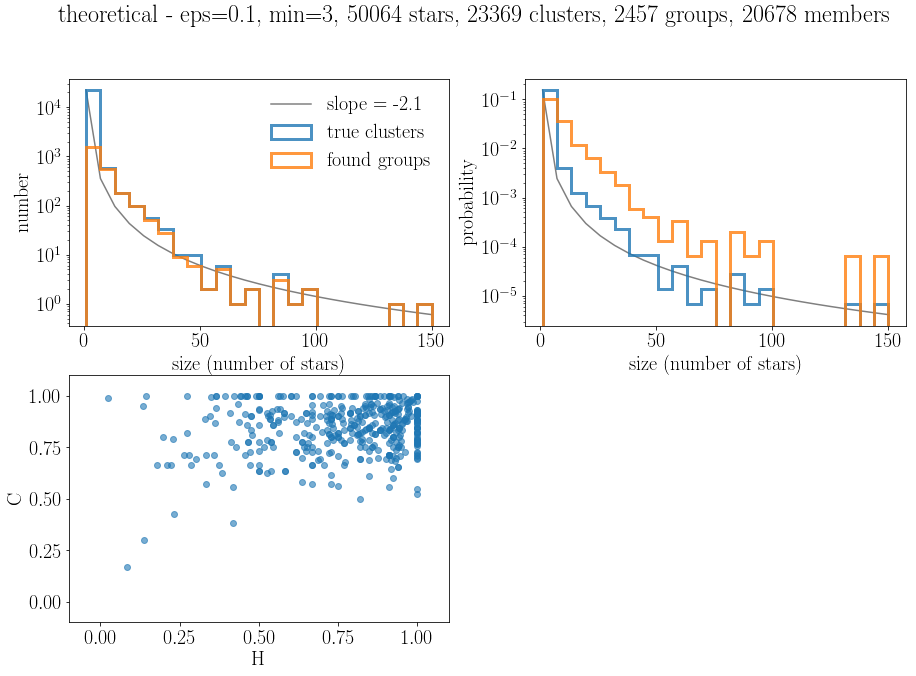

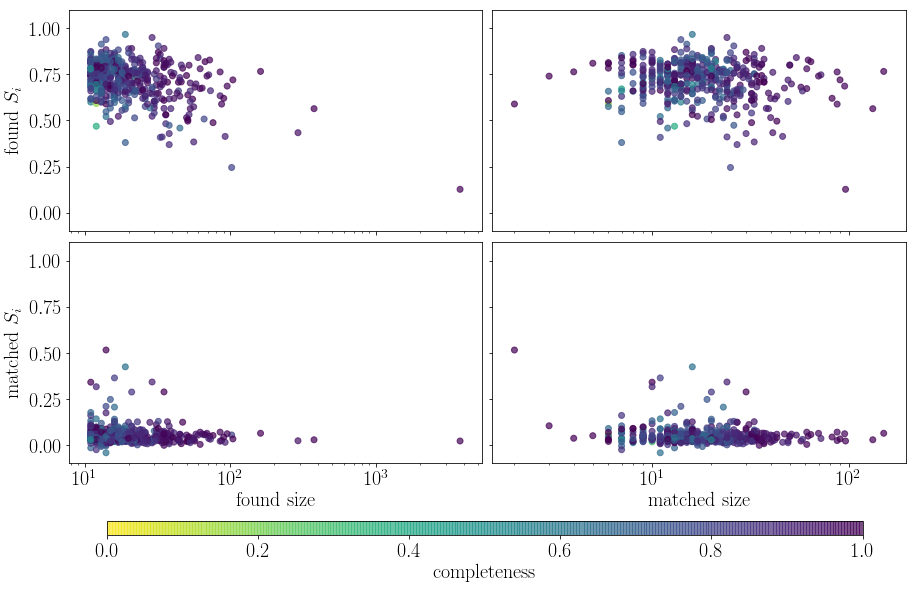

In [64]:
stat_plots(case='12',timestamp='2018-10-22.23.23.06.162144')

# Smaller volume

spectra
abundances
reduced abundances
tophat windows
windows
10 principal components
02 principal components
05 principal components
20 principal components
30 principal components
50 principal components
ting abundances
reduced ting abundances
leung abundances
reduced leung abundances

unmodified:
 		Number of stars: 50064,	number of clusters: 19952 
		stars grouped: 704,	number of groups: 49

principal components:
 		Number of stars: 50064,	number of clusters: 19952 
		stars grouped: 40572,	number of groups: 1895

conservative:
 		Number of stars: 50064,	number of clusters: 19952 
		stars grouped: 4448,	number of groups: 252

optimistic:
 		Number of stars: 50064,	number of clusters: 19952 
		stars grouped: 9385,	number of groups: 1259

theoretical:
 		Number of stars: 50064,	number of clusters: 19952 
		stars grouped: 22332,	number of groups: 2089


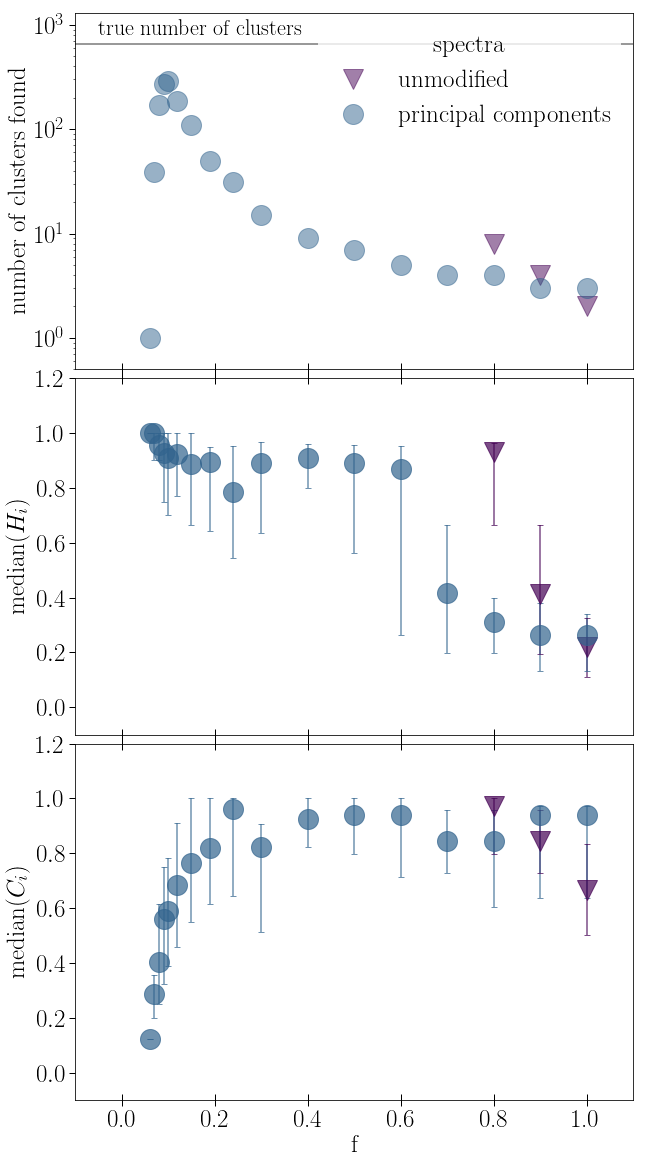

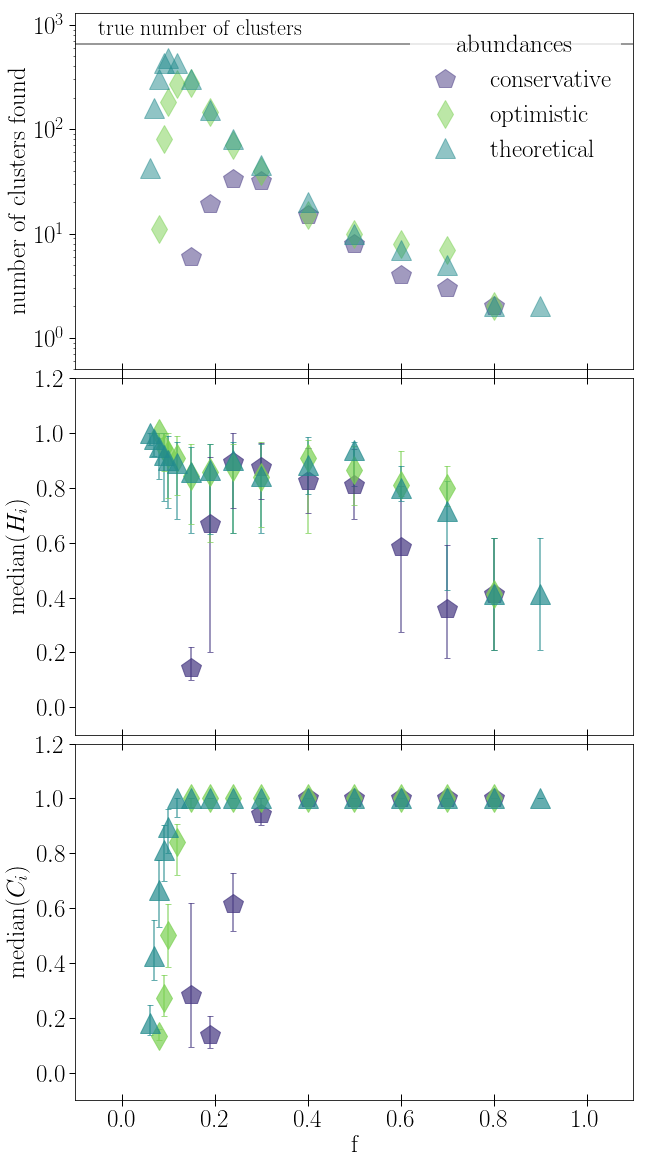

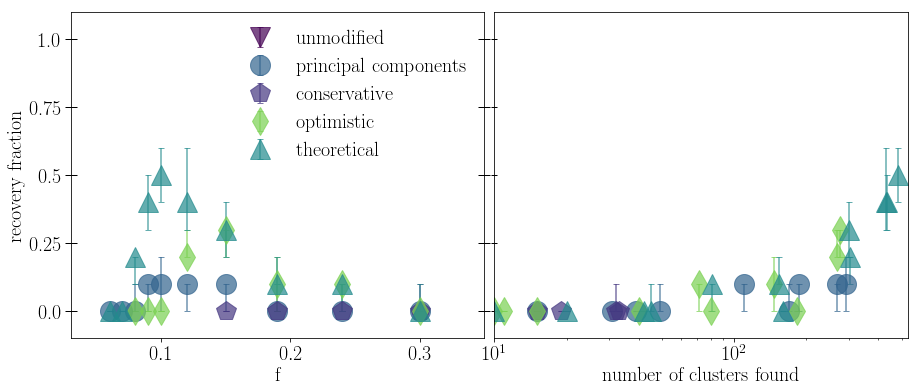

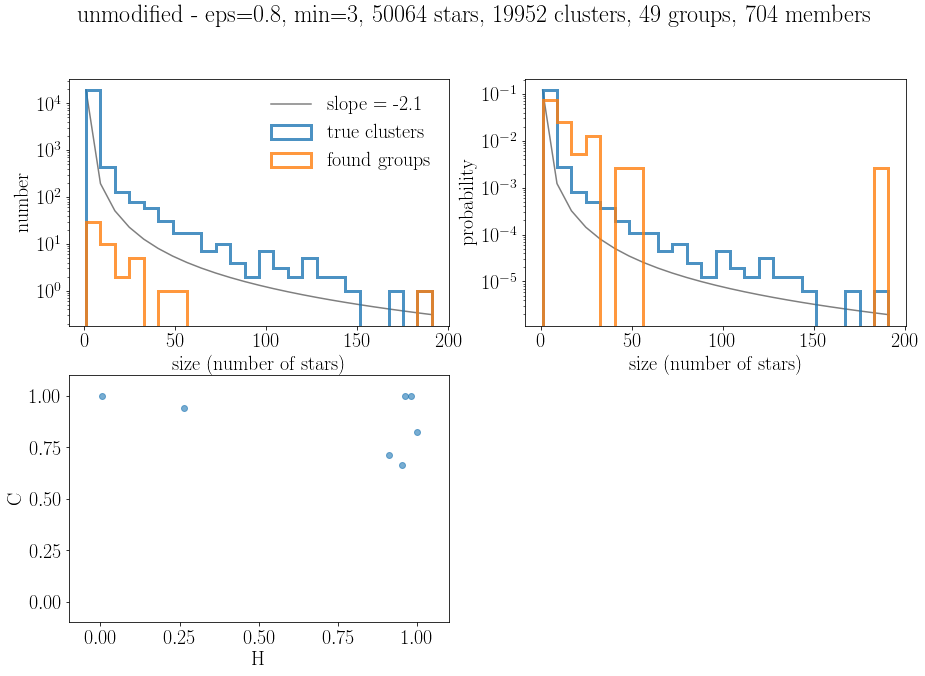

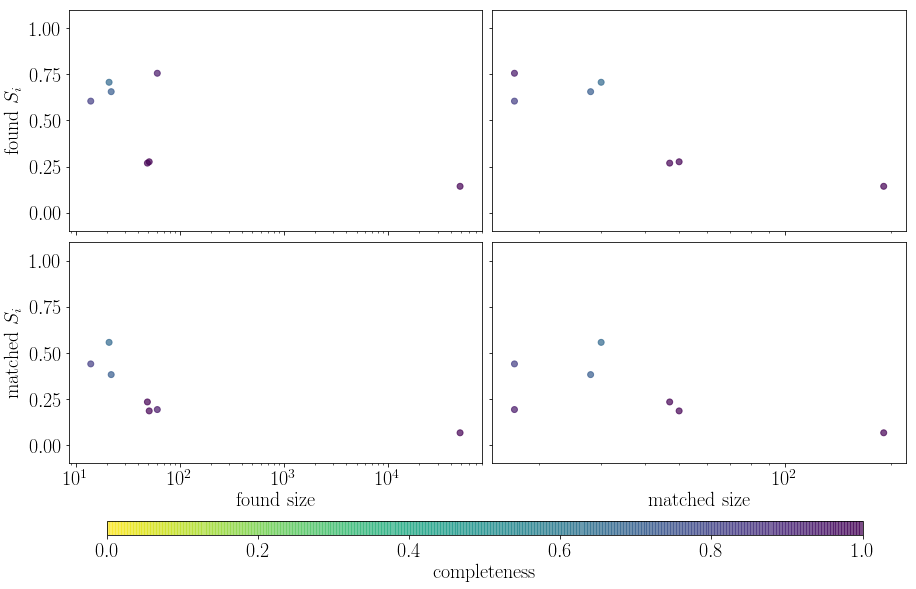

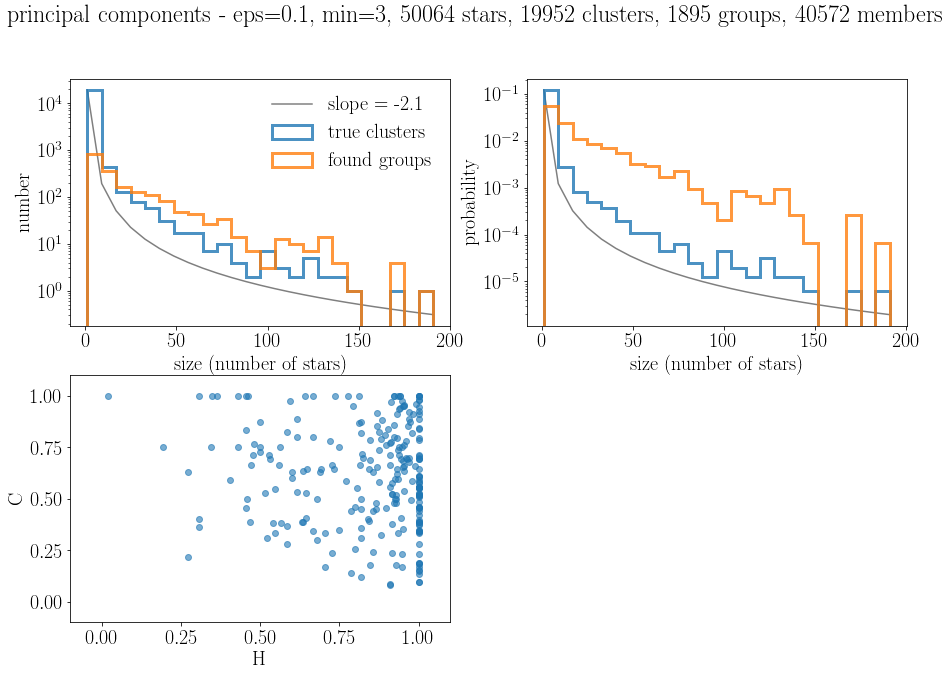

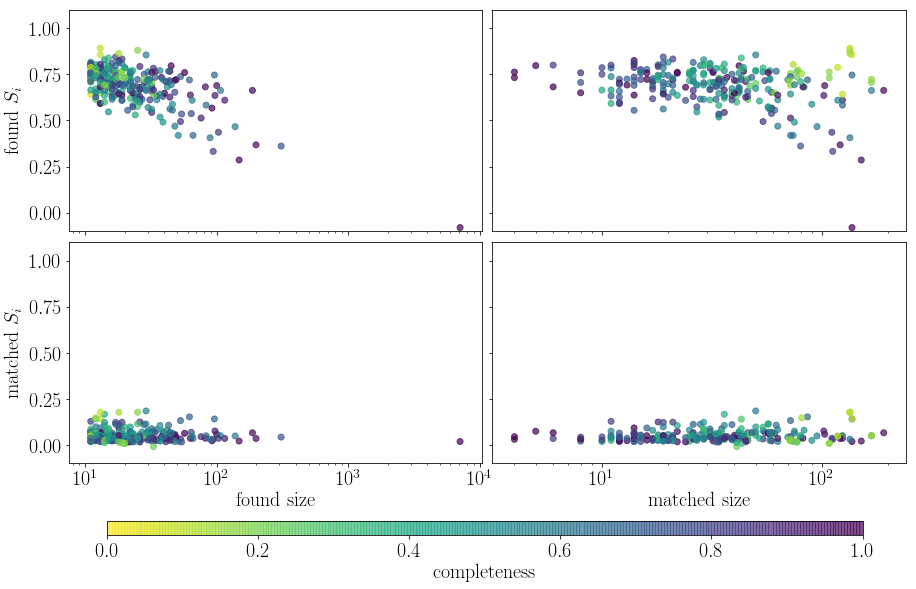

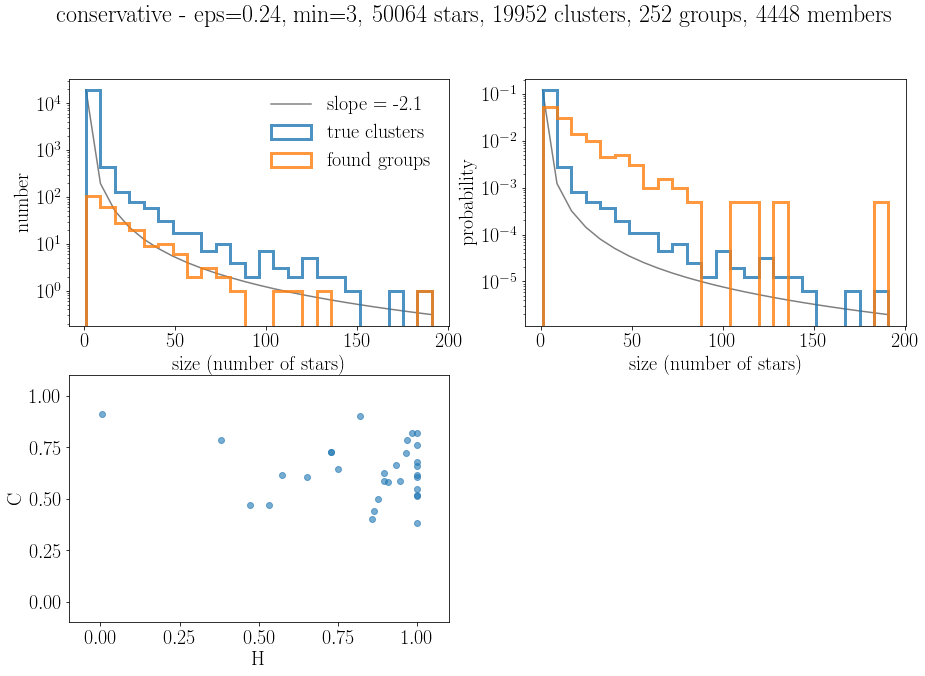

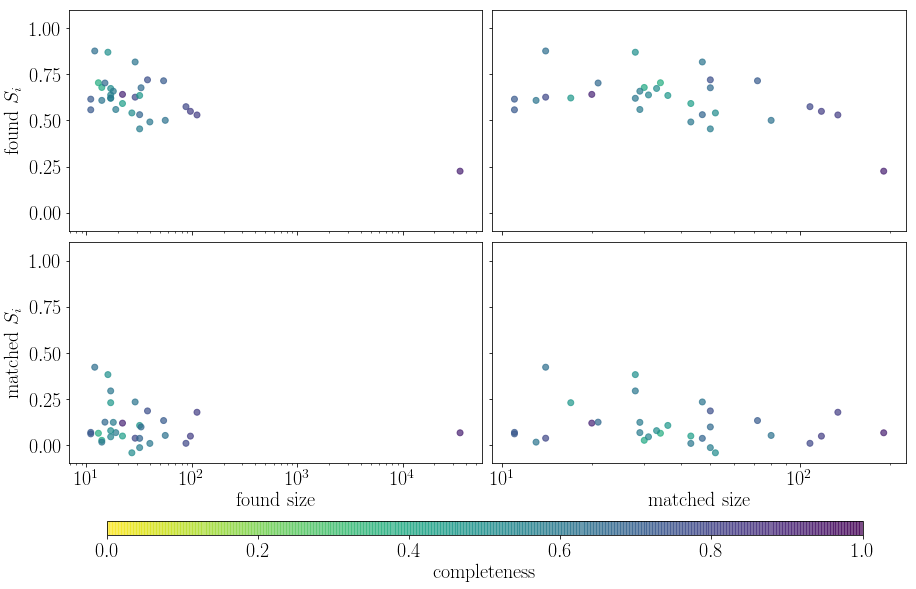

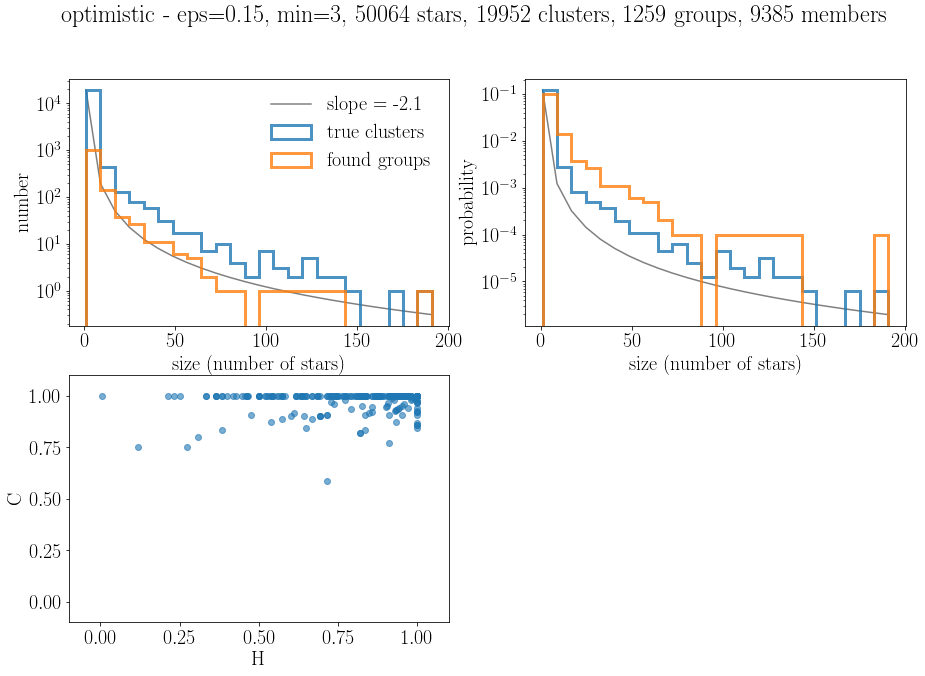

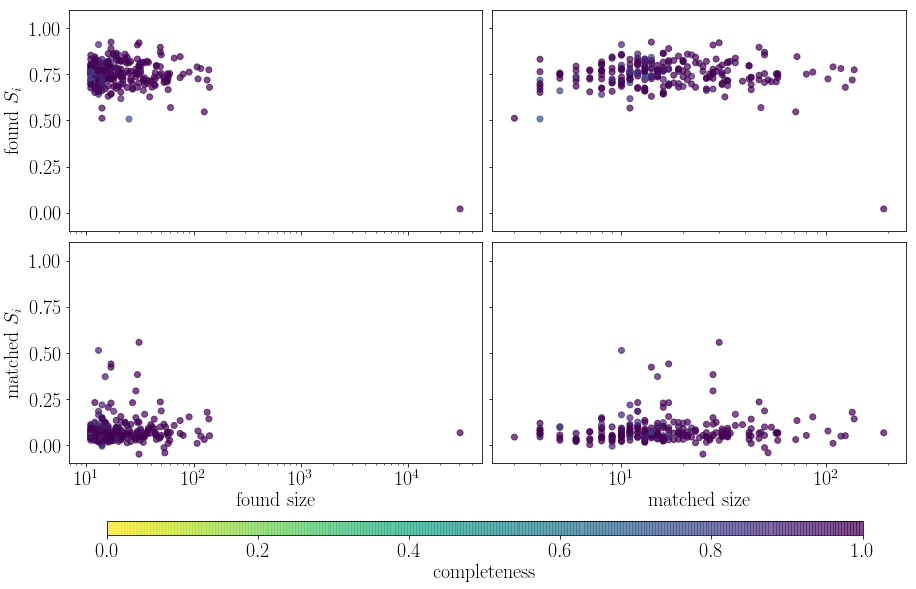

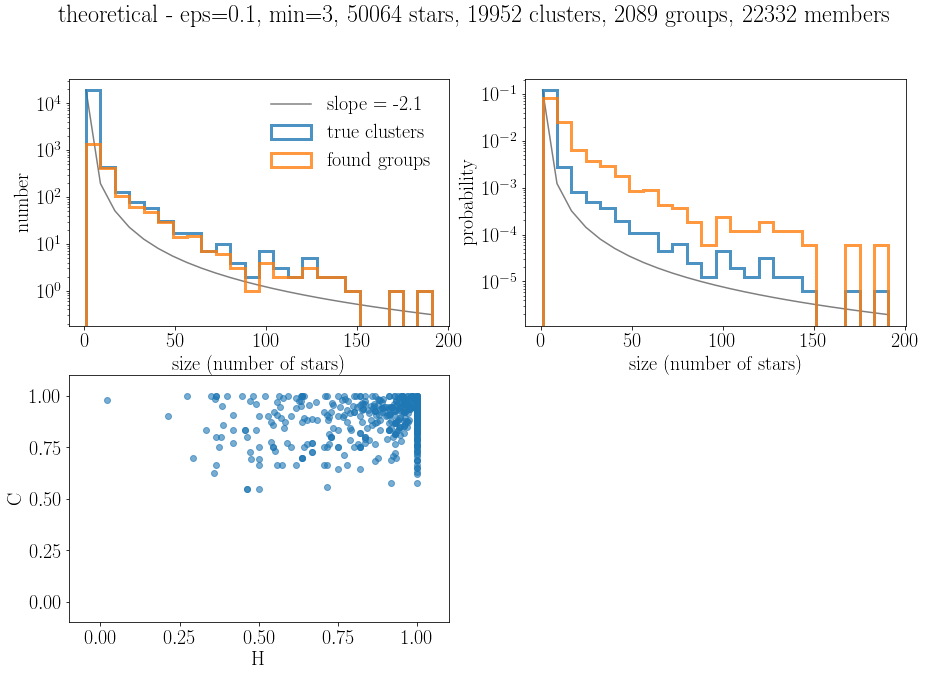

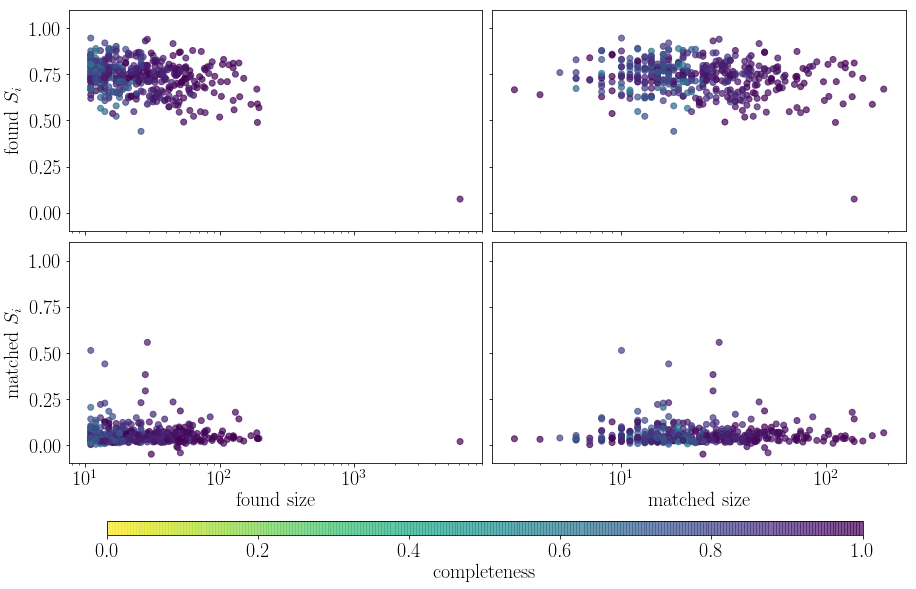

In [ ]:
stat_plots(case='12a',timestamp='2018-10-23.14.11.35.202754')

# Larger volume

In [ ]:
stat_plots(case='12b',timestamp='2018-10-23.16.25.11.246231')

# Shallower CMF

In [ ]:
stat_plots(case='12x',timestamp='2018-10-24.02.09.07.733017',ind=-1.1)

# Steeper CMF

In [ ]:
stat_plots(case='12y',timestamp='2018-10-24.13.04.05.14971',ind=-3.1)